In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quad(x,a0,a1,a2):
    """functional form we are fitting"""
    return a2*x*x + a1*x + a0

In [3]:
def cubic(x,a0,a1,a2,a3):
    """functional form we are fitting"""
    return a3*x*x*x + a2*x*x + a1*x + a0

In [4]:
def generate_data():
    """
    generates a data set and calculates 
    parameters for linear regression
    """
    N = np.random.randint(16,31)
    a3 = float(np.random.randint(-1,1) )
    a2 = float(np.random.randint(-5,5) )
    a1 = float(np.random.randint(-5,5) )
    a0 = float(np.random.randint(-5,5) )
    x = np.linspace(-10,10,N)
    noise_mag = np.random.randint(1,5) + 0.3
    y_noise = np.random.normal(0,noise_mag,N) # normally distributed noise

    if (np.random.rand() > 1.0):
        y = quad(x,a0,a1,a2) + y_noise
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
    else:
        y = cubic(x,a0,a1,a2,a3) + y_noise
        z, residuals, rank, singular_values, rcond = np.polyfit(x, y, 3, full='True')
        p = np.poly1d(z)
        
    #slope,intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot(x,y,linestyle="", marker='x');
    plt.plot(x,p(x),linestyle="-", marker='');
    return x, y, z

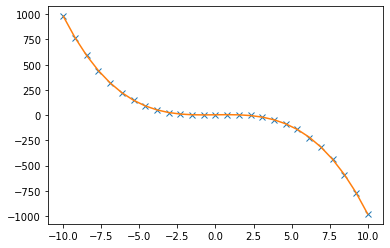

In [5]:
x, y, z = generate_data()

In [6]:
def print_data(x,y):
    """
    prepare data for insertion into Blackboard test - i.e. html
    """
    my_data = "\(x_i\) \t \t \(y_i\)<br>"
    for xi, yi in zip(x,y):
        my_data = my_data + str('{:f}'.format(xi)) + "\t" + str('{:f}'.format(yi)) + "<br>"

    return my_data

In [7]:
z[3]

3.0974848112059936

### Useful sites

https://eli.thegreenplace.net/2012/03/15/processing-xml-in-python-with-elementtree
https://msdn.microsoft.com/en-us/library/ms256086(v=vs.110).aspx
https://docs.python.org/2/library/xml.etree.elementtree.html

In [8]:
import pooler as pooler
number_of_questions = 10
my_pool = pooler.setup_pool(number_of_questions)

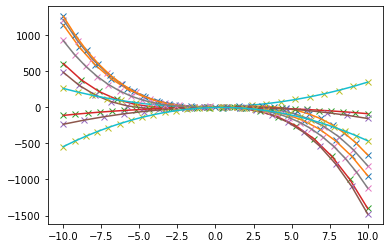

In [9]:
for i in range(number_of_questions):
    question = my_pool.create_question()    
    x, y, z = generate_data()
    my_data = print_data(x,y)
    my_text_cube = """
    <p>Assume that the following data is of the form.<br>
    \( y_i = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + e_i\)<br>
    What is the coefficient of \(x^2\) ( \(a_2\) ) in your fit to the data?</p><br><p>
    """
    my_text_quad = """
    <p>Assume that the following data is of the form.<br>
    \( y_i = a_0 + a_1 x + a_2 x^2 + + e_i\)<br>
    What is the coefficient of \(x^2\) ( \(a_2\) ) in your fit to the data?</p><br><p>
    """
    
    my_pool.set_question_text(question, my_text_cube + my_data)
    my_pool.set_question_accuracy(question, z[1], 0.1)
    my_pool.set_question_answer(question, z[1])
    my_pool.set_question(question)        

In [10]:
# finally output
my_pool.tree.write('cubic_poly.dat')